In [1]:
import pandas as pd
from data import Data

import numpy as np

In [2]:
data = Data("project_train.csv")
data.df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Label
0,0.545,0.884,5,-4.807,0,0.3670,0.290000,0.000000,0.3700,0.641,86.049,1
1,0.795,0.545,7,-8.153,1,0.3430,0.003960,0.000000,0.2730,0.809,91.967,1
2,0.489,0.871,5,-5.825,1,0.3860,0.002850,0.000004,0.1300,0.341,117.431,1
3,0.539,0.931,4,-1.803,0,0.2620,0.000713,0.000000,0.2040,0.685,85.571,0
4,0.918,0.734,11,-2.832,0,0.2690,0.029400,0.000008,0.1910,0.608,97.044,1
...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.897,0.612,11,-10.489,1,0.2110,0.029700,0.186000,0.0894,0.767,102.305,1
501,0.728,0.454,0,-9.281,1,0.0278,0.512000,0.000001,0.0831,0.323,130.368,0
502,0.571,0.837,0,-5.604,1,0.0377,0.165000,0.000005,0.1700,0.713,141.660,1
503,0.582,0.720,10,-9.722,0,0.2310,0.012700,0.035300,0.3630,0.541,89.273,1


In [3]:
data.df.loc[84, "energy"] = 0.734
data.df.loc[94, "loudness"] = -6.542

<AxesSubplot:>

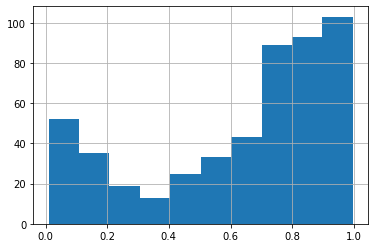

In [4]:
data.df["energy"].hist()

In [5]:
data.remove_duplicates()
data._preprocess()
data.df

There were 6 duplicated elements in the dataset, and have been removed from the dataframe


,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,key_0,...,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode
0,0.054583,0.829423,2.315196,-0.070703,-0.540045,0.778925,0.622930,0.564943,-1.018675,0,...,0,0,1,0,0,0,0,0,0,-1.414922
1,1.384483,-0.290207,2.103830,-0.845610,-0.540045,0.296399,1.249883,0.092258,-0.802711,0,...,0,0,0,0,1,0,0,0,0,0.705336
2,-0.243315,0.786488,2.482527,-0.848617,-0.540034,-0.414954,-0.496630,0.421132,0.126542,0,...,0,0,1,0,0,0,0,0,0,0.705336
3,0.022665,0.984653,1.390472,-0.854406,-0.540045,-0.046841,0.787132,0.989315,-1.036118,0,...,0,1,0,0,0,0,0,0,0,-1.414922
4,2.038794,0.334012,1.452120,-0.776691,-0.540022,-0.111509,0.499778,0.843949,-0.617437,0,...,0,0,0,0,0,0,0,0,1,-1.414922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,1.927083,-0.068923,0.941321,-0.775878,0.000503,-0.616918,1.093144,-0.237746,-0.425448,0,...,0,0,0,0,0,0,0,0,1,0.705336
495,1.028070,-0.590757,-0.672102,0.530714,-0.540041,-0.648257,-0.563803,-0.067093,0.598649,1,...,0,0,0,0,0,0,0,0,0,0.705336
496,0.192893,0.674194,-0.584913,-0.409339,-0.540030,-0.215974,0.891624,0.452352,1.010726,1,...,0,0,0,0,0,0,0,0,0,0.705336
497,0.251408,0.287773,1.117459,-0.821933,-0.437457,0.744104,0.249743,-0.129393,-0.901022,0,...,0,0,0,0,0,0,0,1,0,-1.414922


In [6]:
print(data.df.isna().sum())

danceability        0
energy              0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
loudness            0
tempo               0
key_0               0
key_1               0
key_2               0
key_3               0
key_4               0
key_5               0
key_6               0
key_7               0
key_8               0
key_9               0
key_10              0
key_11              0
mode                0
dtype: int64


In [7]:
str(data)

'project_train.csv'

<AxesSubplot:>

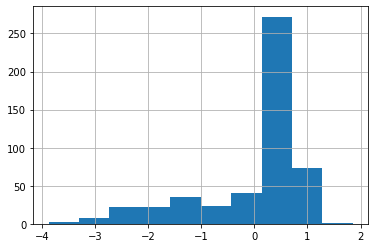

In [8]:
data.df["loudness"].hist()

<AxesSubplot:>

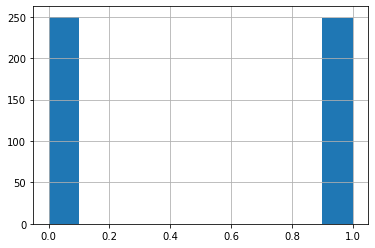

In [9]:
data.labels.hist()

In [10]:
#data.visualize()

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

X_data = data.df.iloc[:,:-1]
calc_vif(X_data)

,variables,VIF
0,danceability,2.749325
1,energy,8.413656
2,speechiness,1.269664
3,acousticness,5.606359
4,instrumentalness,3.704742
5,liveness,1.172893
6,valence,2.307761
7,loudness,7.605509
8,tempo,1.247824
9,key_0,1.048000


In [12]:
from learning_machine import LDA

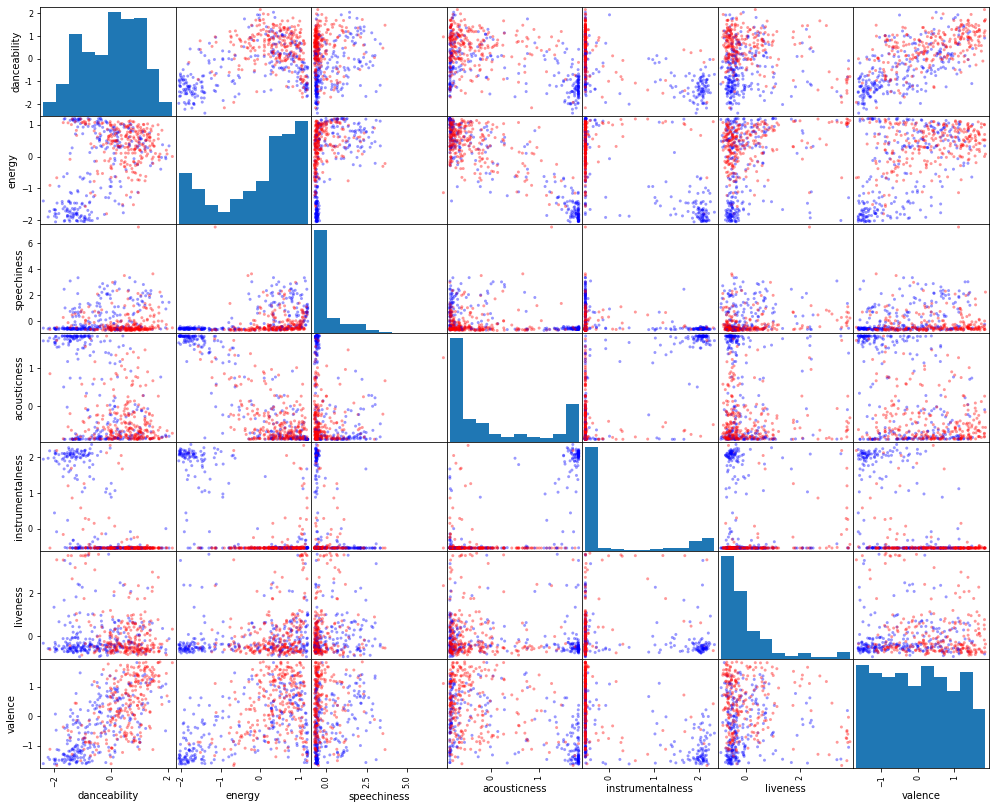

In [13]:
data.visualize()

In [14]:
lda = LDA(data)

In [15]:
lda.cross_validation(shuffle=True)
print(lda.metrics)
print(lda.fitting_parameters)

{0: {'Train Accuracy': [0.8080128205128205, 0.012262495471988], 'Test Accuracy': [0.7734987569324918, 0.039229012035011], 'Train Recall': [0.8694643422777215, 0.019436161423938777], 'Test Recall': [0.8415478403415837, 0.04937247587269951], 'Train Precision': [0.7747747315254436, 0.009753301804449785], 'Test Precision': [0.7444488201670145, 0.05092522536363003], 'Train F1 score': [0.8193267511947591, 0.012611691529252848], 'Test F1 score': [0.7881794938930966, 0.034352963190610195]}}
{0: {'covariance_estimator': None, 'n_components': None, 'priors': None, 'shrinkage': None, 'solver': 'svd', 'store_covariance': False, 'tol': 0.0001}}


In [16]:
lda.metrics

{0: {'Train Accuracy': [0.8080128205128205, 0.012262495471988],
  'Test Accuracy': [0.7734987569324918, 0.039229012035011],
  'Train Recall': [0.8694643422777215, 0.019436161423938777],
  'Test Recall': [0.8415478403415837, 0.04937247587269951],
  'Train Precision': [0.7747747315254436, 0.009753301804449785],
  'Test Precision': [0.7444488201670145, 0.05092522536363003],
  'Train F1 score': [0.8193267511947591, 0.012611691529252848],
  'Test F1 score': [0.7881794938930966, 0.034352963190610195]}}

The LDA model has been trained on the given data
accuracy : 0.811623246492986
recall : 0.872
precision : 0.7785714285714286
F1 : 0.8226415094339622


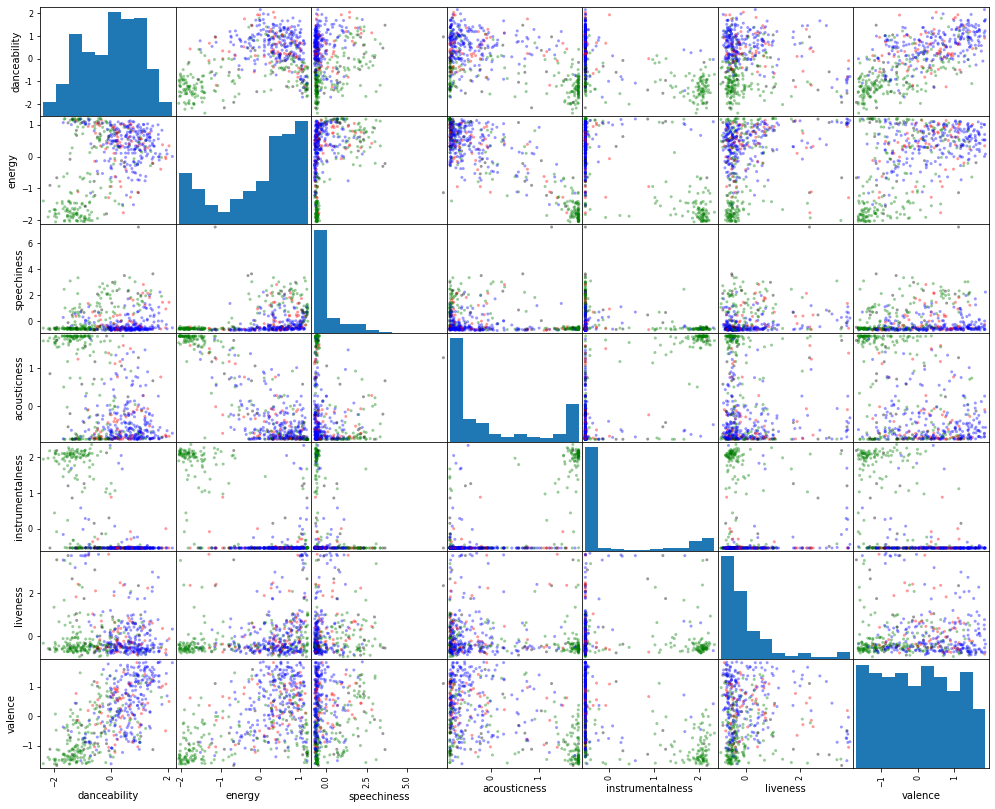

In [17]:
lda.fit_with_all_data()

In [18]:
from learning_machine import QDA

qda = QDA(data)
qda.cross_validation(shuffle=True)
print(qda.metrics)
print(qda.fitting_parameters)

The LDA model has been trained on the given data
{0: {'Train Accuracy': [0.7995974281742352, 0.01272188967231902], 'Test Accuracy': [0.6954962707974756, 0.05696011540638837], 'Train Recall': [0.7951180889690571, 0.052577021695336276], 'Test Recall': [0.659200388961676, 0.12833932747192567], 'Train Precision': [0.8054753372235931, 0.030235367911049804], 'Test Precision': [0.7096445824706694, 0.08622275811674385], 'Train F1 score': [0.7982924027622187, 0.018796750038208764], 'Test F1 score': [0.6760437930988829, 0.08993976374740406]}}
{0: {'priors': None, 'reg_param': 0.0, 'store_covariance': False, 'tol': 0.0001}}


The LDA model has been trained on the given data
accuracy : 0.8056112224448898
recall : 0.824
precision : 0.7953667953667953
F1 : 0.8094302554027504


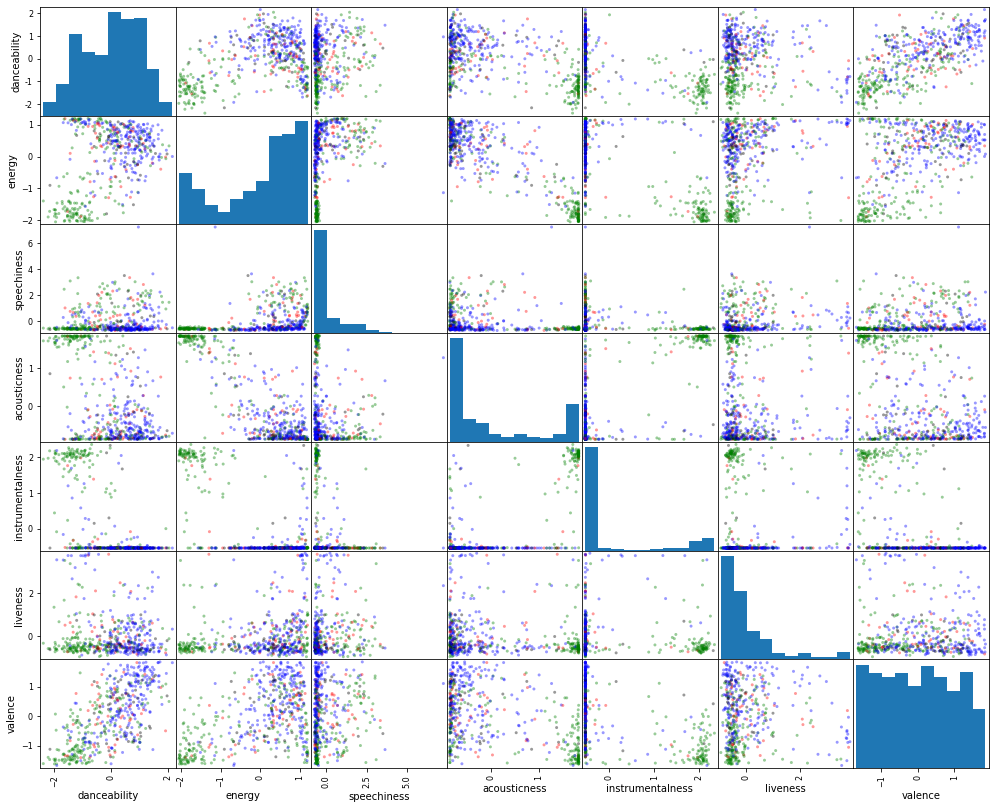

In [19]:
qda.fit_with_all_data()